In [10]:
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split
from sklearn import datasets
from skimage import exposure
import imutils
from keras.optimizers import Adam
from keras.utils import np_utils
import numpy as np
import argparse
import cv2
 

mnist = fetch_mldata('MNIST original')

# 30% data for training set and 70% for testing set
# 30% for training set = 21000
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),mnist.target, test_size=0.25, random_state=42)
 
# 5% data of training set for validation
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,test_size=0.1, random_state=84)

             precision    recall  f1-score   support

        0.0     0.9210    0.9106    0.9157      1677
        1.0     0.9349    0.9576    0.9461      1935
        2.0     0.8523    0.8489    0.8506      1767
        3.0     0.8415    0.8448    0.8432      1766
        4.0     0.8559    0.8640    0.8599      1691
        5.0     0.8195    0.8131    0.8163      1653
        6.0     0.9075    0.8843    0.8958      1754
        7.0     0.8948    0.8987    0.8968      1846
        8.0     0.8153    0.8038    0.8095      1702
        9.0     0.8005    0.8145    0.8074      1709

avg / total     0.8655    0.8655    0.8655     17500

[ 0.85921303  0.86099651  0.87046248  0.85700677  0.85845861]
Accuracy: 0.86 (+/- 0.00)


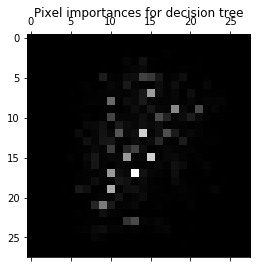

In [3]:
from sklearn import tree
from sklearn import metrics
from sklearn import cross_validation
import matplotlib.pyplot as plt

model = tree.DecisionTreeClassifier(criterion="gini", max_depth=32, max_features=784)
#model = tree.DecisionTreeClassifier()
model = model.fit(trainData, trainLabels)

predictionRes = model.predict(testData)

print(metrics.classification_report(testLabels.tolist(), predictionRes, digits=4))

# Cross Validation Results Exercise 3.3 for Decision Tree
scores = cross_validation.cross_val_score(model, trainData, trainLabels.tolist(), cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() / 2))

# Pixel importances on 28*28 image
importances = model.feature_importances_
importances = importances.reshape((28, 28))

# Plot pixel importances
plt.matshow(importances, cmap=plt.cm.gray)
plt.title("Pixel importances for decision tree")
plt.show()



In [4]:
y_train_pred = model.predict(trainData)
accuracy = \
  ((np.sum(trainLabels == y_train_pred, axis=0)).astype('float') / trainData.shape[0])
accuracy

0.99940740740740741

In [5]:
y_test_pred = model.predict(testData)
accuracy = \
  ((np.sum(testLabels == y_test_pred, axis=0)).astype('float') / testData.shape[0])
accuracy

0.86554285714285717

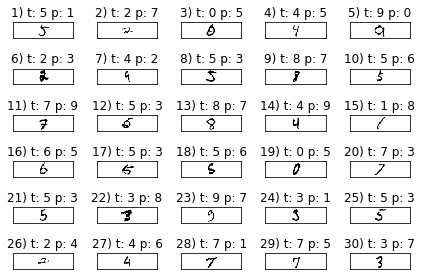

In [6]:
import matplotlib.pyplot as plt

misclassified_img = testData[testLabels != y_test_pred][:30]
correct_lab = testLabels[testLabels != y_test_pred][:30]
misclassified_lab = y_test_pred[testLabels != y_test_pred][:30]

fig, ax = plt.subplots(nrows=6, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(30):
    img = misclassified_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], misclassified_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

/home/ninjakx/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


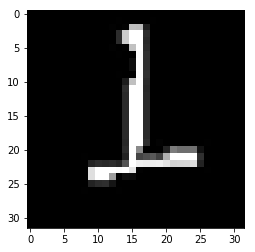

I think that digit is: [ 1.]


In [11]:
from scipy import ndimage
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)

    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty

def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted

# read the image
gray = cv2.imread("sample_dig.png", 0)

# rescale it
gray = cv2.resize(255-gray, (28, 28))
# better black and white version
(thresh, gray) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

while np.sum(gray[0]) == 0:
    gray = gray[1:]

while np.sum(gray[:,0]) == 0:
    gray = np.delete(gray,0,1)

while np.sum(gray[-1]) == 0:
    gray = gray[:-1]

while np.sum(gray[:,-1]) == 0:
    gray = np.delete(gray,-1,1)

rows,cols = gray.shape

if rows > cols:
    factor = 20.0/rows
    rows = 20
    cols = int(round(cols*factor))
    # first cols than rows
    gray = cv2.resize(gray, (cols,rows))
else:
    factor = 20.0/cols
    cols = 20
    rows = int(round(rows*factor))
    # first cols than rows
    gray = cv2.resize(gray, (cols, rows))

colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
gray = np.lib.pad(gray,(rowsPadding,colsPadding),'constant')

shiftx,shifty = getBestShift(gray)
shifted = shift(gray,shiftx,shifty)
gray = shifted

# save the processed images
cv2.imwrite("newdig.png", gray) 
    
(thresh, gray) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
gray = cv2.resize(gray, (28, 28))
img = gray.flatten()

prediction = model.predict(img)

image = img.reshape((28, 28)).astype("uint8")
image = exposure.rescale_intensity(image, out_range=(0, 255))
image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC)

#print(img.shape)

plt.imshow(np.squeeze(image),cmap=plt.get_cmap('gray'))
plt.show()
 
# show the prediction
print("I think that digit is: {}".format(prediction))
#cv2.imshow("Image", image)
#cv2.waitKey(0)